## Memory Test on Drugged Islanders Experiment Analysis
__Project Description:__

An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]: A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg] T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg] S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

- Dosages follow a 1:1 ratio to ensure validity 
- Happy or Sad memories were primed 10 minutes prior to testing 
- Participants tested every day for 1 week to mimic addiction

Building the Case: Obstructive effects of Benzodiazepines (Anti-Anxiety Medicine): - Long term adverse effects on Long Term Potentiation of synapses, metacognition and memory recall ability http://www.jstor.org/stable/43854146

Happy Memories: - research shown positive memories to have a deeper and greater volume of striatum representation under an fMRI https://www.sciencedirect.com/science/article/pii/S0896627314008484

Sad Memories: - research shown sad memories invokes better memory recall for evolutionary purpose whereas, happy memories are more susceptible to false memories http://www.jstor.org/stable/40064315

Participants - all genders above 25+ years old to ensure a fully developed pre-frontal cortex, a region responsible for higher level cognition and memory recall.

__Questions to be answered:__

How does anti-anxiety medicine affect you differently by age? Is there a level of plateauing in effectiveness of anti-anxiety medicine - if so, at what point? Effect of anti-anxiety medicine on memory recall? Effectiveness of placebos in a test environment?

Link to data for future reference: https://www.kaggle.com/steveahn/memory-test-on-drugged-islanders-data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statsmodels.api as sms
import statsmodels.formula.api as smsf
import scipy.stats as stats
import sklearn
import pyDOE as pydoe
import pyDOE2 as pydoe2
from statsmodels.graphics.factorplots import interaction_plot
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
# Load the data
islanders = pd.read_csv('datasets/Islander_data.csv', encoding = 'ISO-8859-1')
islanders.head(10)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
5,Liam,Carrasco,37,S,1,A,66.4,58.1,-8.3
6,Ava,Durand,35,S,1,A,44.1,56.0,11.9
7,Jamie,Durand,38,H,1,A,76.3,74.8,-1.5
8,Josefa,Durand,29,H,1,A,56.2,45.0,-11.2
9,Mark,Durand,36,S,1,A,54.8,75.9,21.1


In [15]:
# Figure out what the unique of the predictor variables in the table are:
print('The unique last names are', islanders.last_name.unique())
print('The ages of the islanders in this dataset is', np.sort(islanders.age.unique()))
print('The unique values for the primed happy or sad memories is', islanders.Happy_Sad_group.unique())
print('The dosage amounts given of each drug are', islanders.Dosage.unique())
print('The coded drug types are', islanders.Drug.unique())

The unique last names are ['Carrasco' 'Durand' 'Gonzalez' 'Kennedy' 'Lopez' 'McCarthy' 'Morin'
 'Price' 'Summers' 'Takahashi' 'Bernard' 'Hajek' 'Rodriguez' 'Steiner'
 'Connolly' 'Castro' 'Fiala' 'Novak']
18
The ages of the islanders in this dataset is [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 59 60 62 63 65 66 68 69 72 73 80 83]
The unique values for the primed happy or sad memories is ['H' 'S']
The dosage amounts given of each drug are [1 2 3]
The coded drug types are ['A' 'S' 'T']


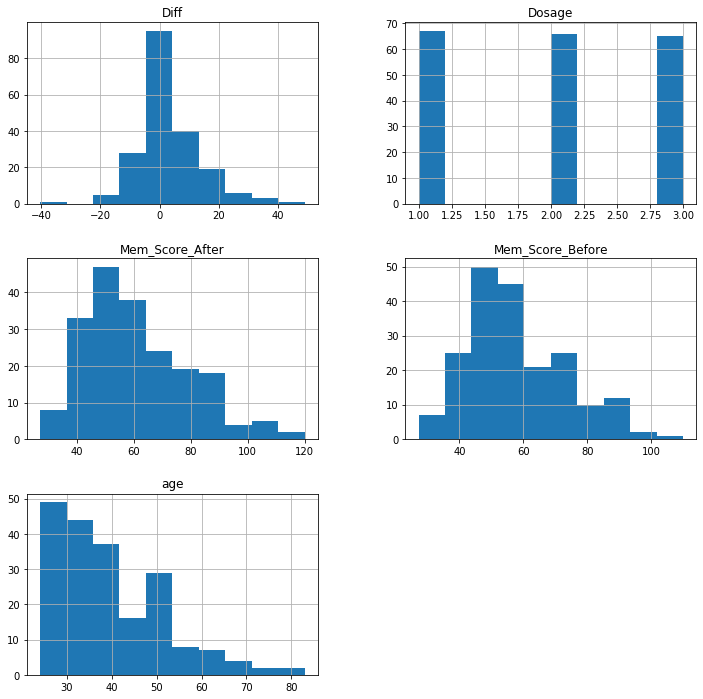

In [27]:
pd.DataFrame.hist(islanders, figsize = (12,12))
plt.savefig('project_imgs/contin_hists.jpg', pad_inches = 0.1)
plt.show()

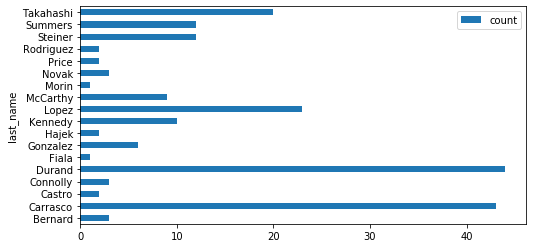

In [29]:
last_names = islanders.groupby('last_name').count().reset_index()
last_names = last_names[['last_name', 'first_name']]
last_names.columns = ['last_name', 'count']
ax0 = last_names.plot.barh(x='last_name', y='count', figsize = (8,4))
plt.savefig('project_imgs/amt_by_last_name.jpg', pad_inches = 0.1)
plt.show()

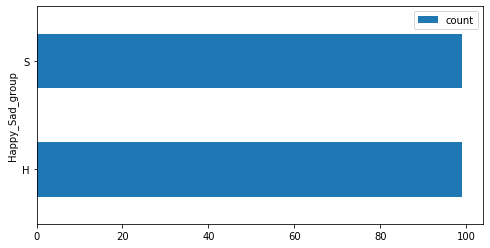

In [31]:
happy_sad = islanders.groupby('Happy_Sad_group').count().reset_index()
happy_sad = happy_sad[['Happy_Sad_group', 'last_name']]
happy_sad.columns = ['Happy_Sad_group', 'count']
ax1 = happy_sad.plot.barh(x='Happy_Sad_group', y='count', figsize = (8,4))
plt.savefig('project_imgs/primed_thoughts.jpg', pad_inches = 0.1)
plt.show()

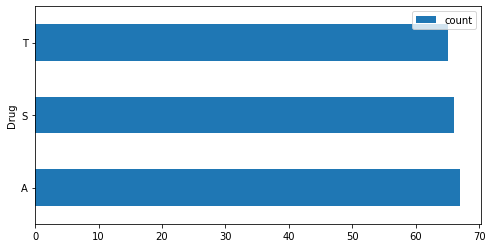

In [32]:
drug = islanders.groupby('Drug').count().reset_index()
drug = drug[['Drug', 'last_name']]
drug.columns = ['Drug', 'count']
ax2 = drug.plot.barh(x='Drug', y='count', figsize = (8,4))
plt.savefig('project_imgs/drug_type.jpg', pad_inches = 0.1)
plt.show()